## LTS Fortunoff Data Analysis

The goal of this notebook is to analyze the data provided by the Fortunoff Archive to the project *Let them Speak* and to offer quantitative insights into the data.

### Import the libraries needed

In [7]:
import sys; sys.path.insert(0, '..')
import pandas as pd
from tqdm.notebook import tqdm
import constants
tqdm.pandas()
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))


In [2]:
from Utilities import mongo_helper
from Utilities import blacklab

### Load the necessary data into a panda dataframe

Get the testimonies metadata from the LTS database

In [3]:
collection = "Fortunoff"
db = "lts"
testimonies = mongo_helper.query(db,"testimonies",{'collection':collection},{'structured_transcript':0,'html_transcript':0,'_id':0})

In [25]:
df_testimonies = pd.DataFrame(testimonies)
df_testimonies =df_testimonies[df_testimonies['status']=="transcript_processed"]

In [176]:
if collection == "Fortunoff":
    additional_metadata=pd.read_csv(parent+'/Data/Output/'+'fortunoff_metadata.csv')
df_testimonies = df_testimonies.merge(additional_metadata)

In [177]:
df_testimonies

,recording_year,testimony_title,ghetto_names,gender,provenance,camp_names,collection,interviewee_name,thumbnail_url,interview_summary,shelfmark,testimony_id,media_url,status,country_of_birth,Unnamed: 0,interviewee_year_of_birth,interview_location
0,1979,Eva B. Holocaust testimony (HVT-1),[],female,Holocaust Survivors Film Project,"[Auschwitz, Theresienstadt]",Fortunoff,"B., Eva,",,"Videotape testimony of Eva B., who was born in...",HVT-1,HVT-1,[],transcript_processed,None,0,1925.0,"New Haven, Conn. :"
1,1979,Leon W. Holocaust testimony (HVT-2),[Łódź],male,Holocaust Survivors Film Project,"[Czestochowa, Buchenwald]",Fortunoff,"W., Leon,",,"Videotape testimony of Leon W., who was born i...",HVT-2,HVT-2,[],transcript_processed,Poland,1,1925.0,"New Haven, Conn. :"
2,1979,Sally H. Holocaust testimony (HVT-3),[Zwoleń],female,Holocaust Survivors Film Project,"[Czestochowa, Skarzysko-Kamienna]",Fortunoff,"H., Sally,",,"Videotape testimony of Sally H., who was born ...",HVT-3,HVT-3,[],transcript_processed,Poland,2,1928.0,"New Haven, Conn. :"
3,1980,Sylvia B. and Frances G. Holocaust testimony (...,[Ungvár],,Holocaust Survivors Film Project,"[Riga-Kaiserwald, Auschwitz, Stutthof]",Fortunoff,"B., Sylvia,",,"Videotape testimony of Sylvia B., who was born...",HVT-4,HVT-4,[],transcript_processed,Czechoslovakia,3,1928.0,"New Haven, Conn. :"
4,1980,Renée G. Holocaust testimony (HVT-5),[Łosice],female,Holocaust Survivors Film Project,[],Fortunoff,"G., Renée,",,"Videotape testimony of Renée G., who was born...",HVT-5,HVT-5,[],transcript_processed,Poland,4,1932.0,"New Haven, Conn. :"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,1982,Serena N. Holocaust testimony (HVT-179),[Munkács],female,Video Archive for Holocaust Testimonies at Yale,"[Auschwitz, Ravensbrück, Neustadt-Glewe]",Fortunoff,"N., Serena,",,"Videotape testimony of Serena N., the oldest o...",HVT-179,HVT-179,[],transcript_processed,Czechoslovakia,176,1927.0,"New York, N.Y. :"
172,1980,Abraham B. Holocaust testimony (HVT-180),[],male,Holocaust Survivors Film Project,"[Auschwitz, Flossenbürg, Litoměřice, Dachau]",Fortunoff,"B., Abraham,",,"Videotape testimony of Abraham B., who was bor...",HVT-180,HVT-180,[],transcript_processed,Poland,177,1924.0,"Norfolk, Va. :"
173,1982,Bella G. Holocaust testimony (HVT-181),[Czernowitz],female,Video Archive for Holocaust Testimonies at Yale,[],Fortunoff,"G., Bella,",,"Videotape testimony of Bella G., who was born ...",HVT-181,HVT-181,[],transcript_processed,None,178,1920.0,"New York, N.Y. :"
174,1982,Jonas G. Holocaust testimony (HVT-182),[Czernowitz],male,Video Archive for Holocaust Testimonies at Yale,[],Fortunoff,"G., Jonas,",,"Videotape testimony of Jonas G., who was born ...",HVT-182,HVT-182,[],transcript_processed,None,179,1914.0,"New York, N.Y. :"


### Print the number of testimonies that are processed and in the dataset

In [28]:
print (len(df_testimonies[df_testimonies['status']=="transcript_processed"]))

176


### Make a historiogram about the distribution of interview years

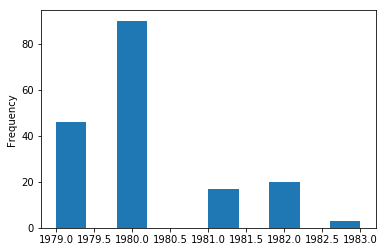

In [29]:
df_testimonies.recording_year.plot.hist()

### Print the earliest and latest interviews

In [30]:
df_testimonies.recording_year.max()

1983

In [31]:
df_testimonies.recording_year.min()

1979

### Print the interview locations

todo

### Print the average token number

In [32]:
def get_token_counts(testimony_id):
    result = blacklab.iterable_results('[]',lemma=False,path_to_phrase_model=None,window=0,document_ids=[testimony_id])
    tokens = [element for element in result]
    return (len(tokens))

In [33]:
#df_testimonies['word_count'] = df_testimonies.testimony_id.progress_apply(get_token_counts)

### Print the median token number

In [34]:
#df_testimonies['word_count'].median()

### Print the shortest interviews

In [35]:
#df_testimonies.sort_values('word_count')[0:5][['testimony_title','word_count']]

### Print the longest interviews

In [36]:
#df_testimonies.sort_values('word_count',ascending=False)[0:5][['testimony_title','word_count']]

### Print a histogram

In [37]:
#df_testimonies.word_count.plot.hist()

In [38]:
df_testimonies.columns

Index(['recording_year', 'testimony_title', 'ghetto_names', 'gender',
       'provenance', 'camp_names', 'collection', 'interviewee_name',
       'thumbnail_url', 'interview_summary', 'shelfmark', 'testimony_id',
       'media_url', 'status'],
      dtype='object')

### Print the number of men and women interviewees

First, women:

In [39]:
women = len(df_testimonies[(df_testimonies.gender=="female") & (df_testimonies.testimony_title.str.contains('and')==False)])

In [40]:
print (women)

78


Second, men:

In [41]:
men = len(df_testimonies[(df_testimonies.gender=="male") & (df_testimonies.testimony_title.str.contains('and')==False)])

In [42]:
print (men)

71


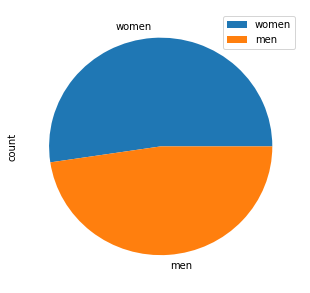

In [43]:
gender_plot = pd.DataFrame({'count':[women,men]},index=['women','men'])
plot = gender_plot.plot.pie(y='count', figsize=(5, 5))

In [44]:
df_testimonies.testimony_id[20]

'HVT-22'

In [171]:
def identify_country_of_birth(text):
    import spacy
    import pycountry
    hist_countries = ["Yugoslavia",'Czechoslovakia','Russia']
    countries = [element.name for element in list(pycountry.countries)]
    countries.extend(hist_countries)
    born_sentence=[]
    nlp = spacy.load('en_core_web_sm') # Load the English Model
    doc = nlp(text)
    result = []
    for i,sent in enumerate(doc.sents):
        sentence_tokens = [token.text for token in sent]
        if "born" in sentence_tokens:
            labels = [token.text for token in sent]
            doc = nlp(' '.join(labels))
            if doc.ents:
                for element in doc.ents:
                    if (element.text in countries):
                        result.append(element.text)
            break
        if i==3:
            break
    if len(result)==1:
        return result[0]
    elif len(result)>1:
        return "fuzzy"
    else:
        return None

In [174]:
#df_testimonies['country_of_birth'] = df_testimonies.interview_summary.progress_apply(identify_country_of_birth)

In [178]:
df_testimonies.columns

Index(['recording_year', 'testimony_title', 'ghetto_names', 'gender',
       'provenance', 'camp_names', 'collection', 'interviewee_name',
       'thumbnail_url', 'interview_summary', 'shelfmark', 'testimony_id',
       'media_url', 'status', 'country_of_birth', 'Unnamed: 0',
       'interviewee_year_of_birth', 'interview_location'],
      dtype='object')

### Visualize the distribution of year of births

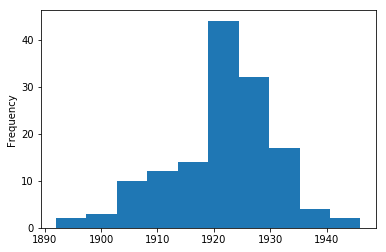

In [181]:
df_testimonies.interviewee_year_of_birth.plot.hist()

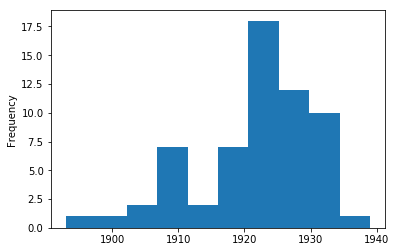

In [192]:
df_testimonies[df_testimonies.gender=="female"].interviewee_year_of_birth.plot.hist()

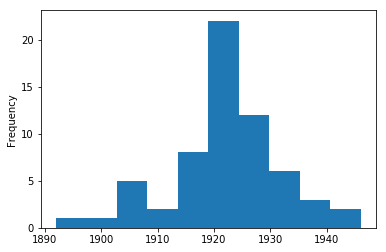

In [228]:
df_testimonies[df_testimonies.gender=="male"].interviewee_year_of_birth.plot.hist()

In [225]:
women = df_testimonies[df_testimonies.gender=="female"][['interviewee_year_of_birth']]
men = df_testimonies[df_testimonies.gender=="male"][['interviewee_year_of_birth']]
#df = pd.DataFrame([women,men],index=['women','men'])

In [223]:
women

,interviewee_year_of_birth
0,1925.0
2,1928.0
4,1932.0
5,1924.0
6,1929.0
...,...
167,1919.0
169,1928.0
171,1927.0
173,1920.0


/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


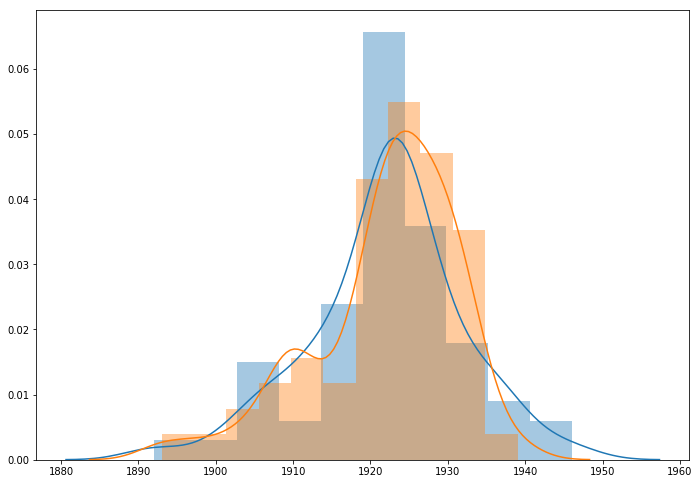

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(men[['interviewee_year_of_birth']].dropna(), hist=True, rug=False,label="Men")
sns.distplot(women[['interviewee_year_of_birth']].dropna(), hist=True, rug=False,label = 'Female')

In [184]:
df_testimonies.interviewee_year_of_birth.min()

1892.0

In [186]:
df_testimonies.interviewee_year_of_birth.mean()

1921.35

In [187]:
df_testimonies['age_interview_year']=df_testimonies['recording_year']-df_testimonies['interviewee_year_of_birth']

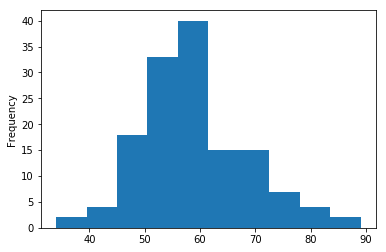

In [189]:
df_testimonies['age_interview_year'].plot.hist()

In [190]:
df_testimonies['age_interview_year'].mean()

58.82857142857143